# Climate Analysis

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import join, outerjoin, MetaData
from sqlalchemy import Table, Column, Integer, String, Float

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()
meta = MetaData()
inspector = inspect(engine)
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [3]:
DB = automap_base()
DB.prepare(engine, reflect=True)
tables = DB.classes.keys()

In [4]:
Measurement = DB.classes.measurement
Station = DB.classes.station

In [5]:
session = Session(engine)

In [6]:
session.query(Station.station, Station.name).all()

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

Precipitation Analysis

In [7]:
# Calculate the date one year from the last date in data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [8]:
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [9]:
pr_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

In [10]:
# Perform a Query to Retrieve the Data and Precipitation Scores
all_scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column & Sort the dataframe by date
pr_df = pd.DataFrame(pr_data, columns=["Date","Precipitation"])
pr_df.set_index("Date", inplace=True,)
pr_df.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


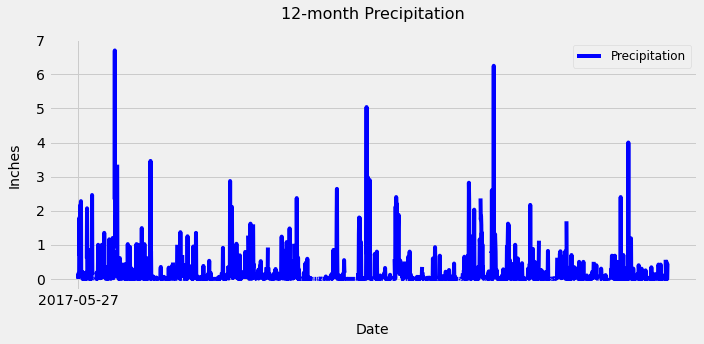

In [12]:
# Sort the dataframe by date

pr_df = pr_df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data

ax = pr_df.plot(figsize=(10,5), color='Blue')
ax.set_title(f'12-month Precipitation', fontsize=16, pad=20)
ax.set_xlabel('Date', fontsize=14, labelpad=15)
ax.set_ylabel('Inches', fontsize=14, labelpad=15)
ax.legend(loc='best', fontsize=12)
plt.xticks([1])
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for precipitation data
pr_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Station Analysis

In [14]:
# Design a query to calculate the total number of stations

stations_count = session.query(Measurement.station).group_by(Measurement.station).count()
print(f"There are {stations_count} stations in this dataset.")

There are 9 stations in this dataset.


In [15]:
# Design a query to find the most active stations

most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                      .group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

# List the stations and the counts in descending order.

for row in most_active_stations:
    print(row)



('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_id = 'USC00519281' # most active station id from above

low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station==station_id).first()
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station==station_id).first()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station==station_id).first()

print(f"Station ID = {station_id}\n\
Low Temp = {low_temp[0]}\n\
High Temp = {high_temp[0]}\n\
Avg Temp = {avg_temp[0]}")

Station ID = USC00519281
Low Temp = 54.0
High Temp = 85.0
Avg Temp = 71.66378066378067


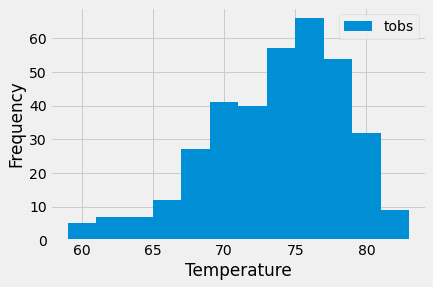

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

end_date = dt.date(2017, 8, 18)
year_days = dt.timedelta(365)
begin_date = end_date - year_days

tobs = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station\
                    == station_id).filter(Measurement.date >= begin_date).order_by(Measurement.date).all()

# Create DataFrame from query

tobs_df = pd.DataFrame(tobs)

# Histogram Plot
plt.hist(tobs_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"], loc="best")
plt.show()